# Methods & Codes

In [5]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("../../../data/01-modified-data/after_clean_mobile_phone_rating.csv")

# Data Selection

In [6]:
# Split the dataset in X and y. since this is unsupervised learning, we will not use the y labels. you can choose to normalize the X data by using the StandardScaler function.
X=df[['Launch Price','CAMERA','SELFIE','AUDIO','DISPLAY','BATTERY']]
y=df[['buying_intent']]

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [9]:
# import relevent libraries for clustering. we will use KMeans, AgglomerativeClustering, MeanShift, Birch, and DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, MeanShift, Birch, DBSCAN
from scipy.spatial.distance import cdist

# Hyper-parametertuning

## K means

In [10]:
# for k means clustering we will use the elbow method to find the optimal number of clusters. we will use the inertia_ attribute to find the sum of squared distances of samples to their closest cluster center. we will use the range of 1 to 10 clusters. plot the inertia_ values for each number of clusters. make sure to save it in a dataframe and plot it using matplotlib.
inertia = []
distortions = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(X_normalized)
    inertia.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(X_normalized,kmeans.cluster_centers_, 'euclidean'),axis=1)) /X_normalized.shape[0])

df_inertia = pd.DataFrame({'Number of Clusters': range(1, 11), 'Inertia': inertia})
df_distortions=pd.DataFrame({'Number of Clusters': range(1, 11), 'distortions': distortions})

/Users/sherryqin/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sherryqin/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sherryqin/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sherryqin/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

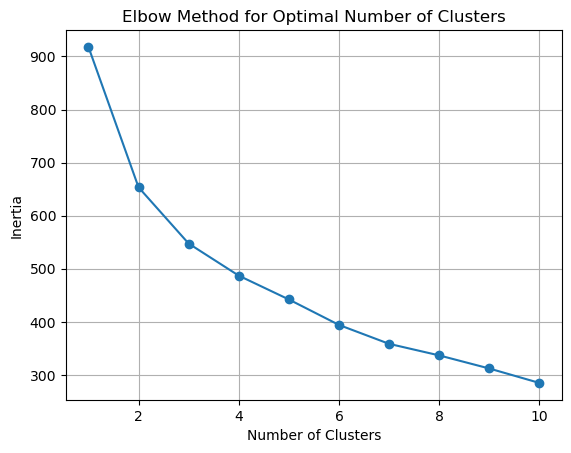

In [11]:
# plot distortion and inertia for kmeans, you can either plot them seperately or use fig, ax = plt.subplots(1, 2) to plot them in the same figure. Suggest the optimal number of clusters based on the plot.
plt.plot(df_inertia['Number of Clusters'], df_inertia['Inertia'], marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

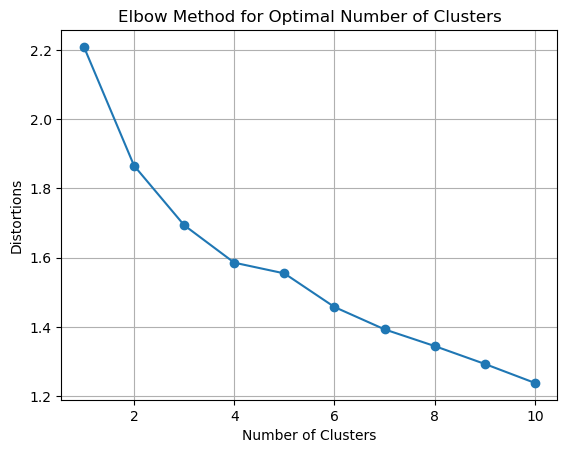

In [12]:
plt.plot(df_inertia['Number of Clusters'], df_distortions['distortions'], marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortions')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

#### Analysis
By using K means algorithm, we can see the inertia and distortion with different number of clusters by using hyper-parameter elbow methods. From the graphs above, it seemed that 2 is the optimal number of clusters for me dataset. However, it's not a obvious elbow can be shown from the graph, so maybe the elbow method is not the best method for this dataset.

# DBSCAN

In [13]:
# UTILITY PLOTTING FUNCTION
def plot(X,color_vector):
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1],c=color_vector, cmap="viridis") #, alpha=0.5) #, c=y
    ax.set(xlabel='Feature-1 (x_1)', ylabel='Feature-2 (x_2)',
    title='Cluster data')
    ax.grid()
    # fig.savefig("test.png")
    plt.show()

In [14]:
import sklearn.cluster

# THIS WILL ITERATE OVER ONE HYPER-PARAMETER (GRID SEARCH) 
# AND RETURN THE CLUSTER RESULT THAT OPTIMIZES THE SILHOUETTE SCORE
def maximize_silhouette(X,algo="birch",nmax=20,i_plot=False):

    # PARAM
    i_print=False

    #FORCE CONTIGUOUS
    X=np.ascontiguousarray(X) 

    # LOOP OVER HYPER-PARAM
    params=[]; sil_scores=[]
    sil_max=-10
    for param in range(2,nmax+1):
        if(algo=="birch"):
            model = sklearn.cluster.Birch(n_clusters=param).fit(X)
            labels=model.predict(X)

        if(algo=="ag"):
            model = sklearn.cluster.AgglomerativeClustering(n_clusters=param).fit(X)
            labels=model.labels_

        if(algo=="dbscan"):
            #param=0.5*(param-1)
            model = sklearn.cluster.DBSCAN(eps=param).fit(X)
            labels=model.labels_

        if(algo=="kmeans"):
            model = sklearn.cluster.KMeans(n_clusters=param).fit(X)
            labels=model.predict(X)

        try:
            sil_scores.append(sklearn.metrics.silhouette_score(X,labels))
            params.append(param)
        except:
            continue 

        if(i_print): print(param,sil_scores[-1])
        
        if(sil_scores[-1]>sil_max):
             opt_param=param
             sil_max=sil_scores[-1]
             opt_labels=labels

    print("OPTIMAL PARAMETER =",opt_param)

    if(i_plot):
        fig, ax = plt.subplots()
        ax.plot(params, sil_scores, "-o")  
        ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        plt.show()

    return opt_labels

OPTIMAL PARAMETER = 4


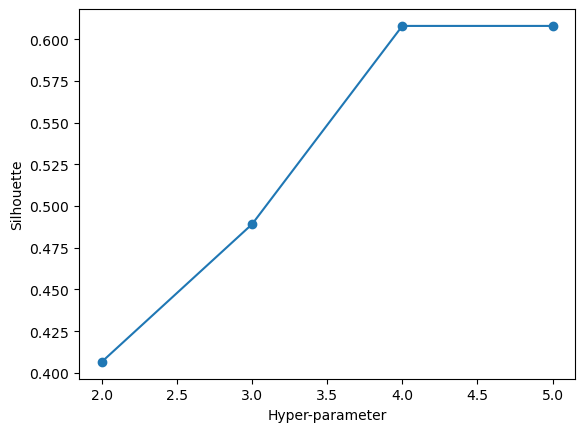

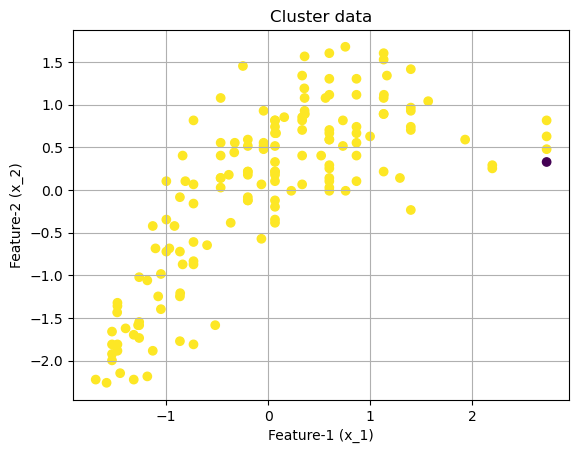

In [15]:
# DBSCAN (class code)
opt_labels=maximize_silhouette(X_normalized,algo="dbscan",nmax=15, i_plot=True)
plot(X_normalized,opt_labels)

#### Analysis
By using DBSCAN Algorithm with silhouette method, we can see when the clusters=4, we will get the maximum silhouette score and also after cluster=4 the silhouette score did not imporve, thus we can conclude that the optimal clusters are 4 for the DBSCAN method.

# Agglomerative Hierarchy


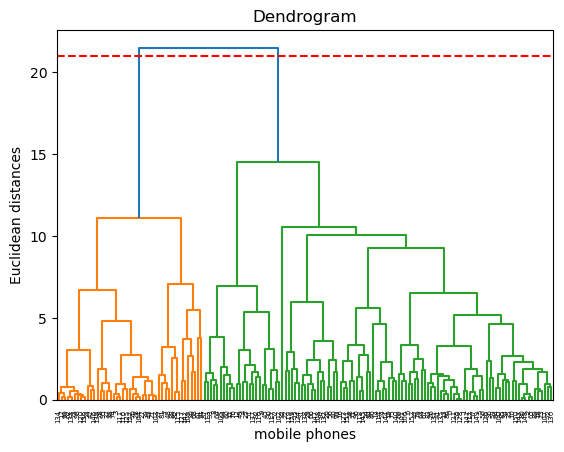

In [16]:
import scipy.cluster.hierarchy as sch

d = sch.dendrogram(sch.linkage(X_normalized, method='ward'))
plt.axhline(y=21, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('mobile phones')
plt.ylabel('Euclidean distances')
plt.show()

OPTIMAL PARAMETER = 2


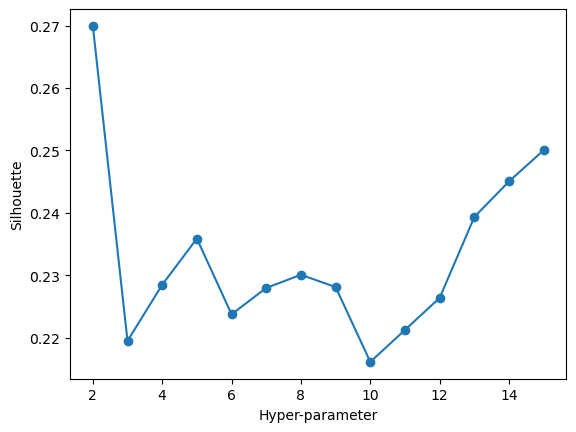

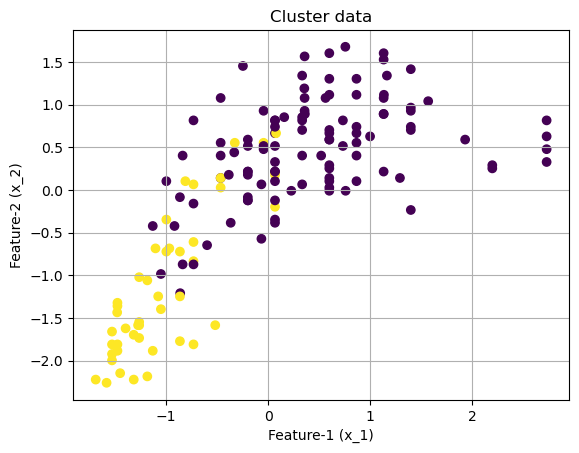

In [17]:
# AGGLOMERATIVE CLUSTERING (class code, can neglect this part)
opt_labels=maximize_silhouette(X_normalized,algo="ag",nmax=15, i_plot=True)
plot(X_normalized,opt_labels)

#### Analysis
From the first graph, we can see there are two blue lines that intersect with the red lines, which may indicate that the optimal clusters would be 2.
Using the Agglomerative Hierarchy Algorithm with hyperparameter tuning by maximize the silhouette score, we can also get the optimal clusters would be 2.
Thus, we can conclude that the optimal cluster would be 2 by using Agglomerative Hierarchy Algorithm.

# Meanshift

In [18]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

number of estimated clusters :  4


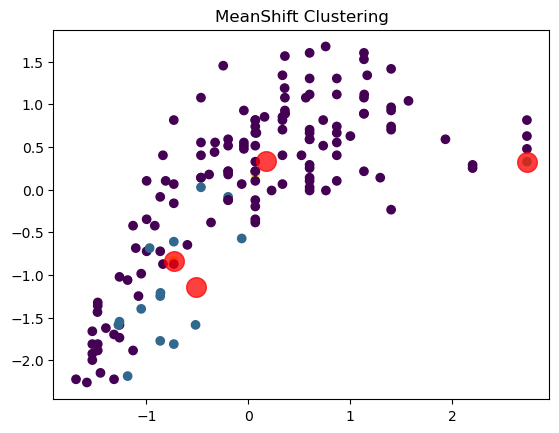

In [19]:
# Perform MeanShift Clustering and predict number 
bandwidth = estimate_bandwidth(X_normalized, quantile=0.2, n_samples=300)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_normalized)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

print("number of estimated clusters : " , n_clusters)

plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, alpha=0.75)
plt.title("MeanShift Clustering")
plt.show()

#### Analysis
By using the Meanshift methods, we can see the optimal clusters would be 4. However, from the graph above, the center points of each cluster are in red, we can see there are not obvious clusters pattern around those red center points. Thus, we may consider that Meanshift is also not the best way for us to predict the number of clusters.

# Birch

In [20]:
from sklearn.metrics import silhouette_score

In [21]:
# Define the range of threshold values for the Birch algorithm
threshold = np.arange(0.1, 2.5, 0.25)
si_score = []

for i in threshold:
    birch = Birch(threshold=i)
    birch.fit(X_normalized)
    labels_count = len(np.unique(birch.labels_))
    
    if labels_count > 1:
        score = silhouette_score(X_normalized, birch.labels_)
        si_score.append((i, score, labels_count))

birch_results = pd.DataFrame(si_score, columns=['threshold', 'silhouette_score', 'clusters'])

max_Siscore_index2=birch_results['silhouette_score'].idxmax()
optimal_clusters= birch_results.loc[max_Siscore_index2,'clusters']


print(birch_results)
print("The optimal clusters is:", optimal_clusters)

   threshold  silhouette_score  clusters
0       0.10          0.196580         3
1       0.35          0.215733         3
2       0.60          0.200076         3
3       0.85          0.278162         3
4       1.10          0.280914         3
5       1.35          0.290139         3
6       1.60          0.281099         3
7       1.85          0.285555         3
8       2.10          0.405346         3
9       2.35          0.271998         3
The optimal clusters is: 3


OPTIMAL PARAMETER = 3


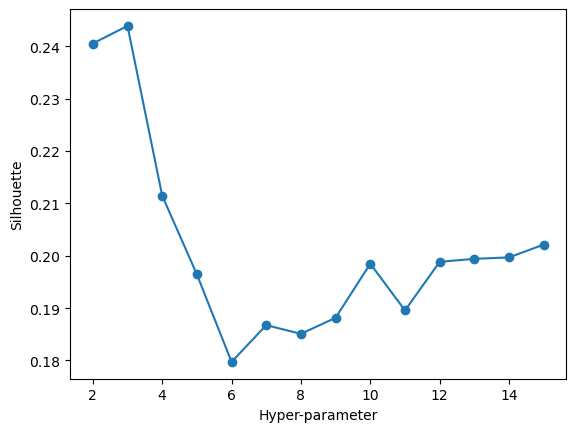

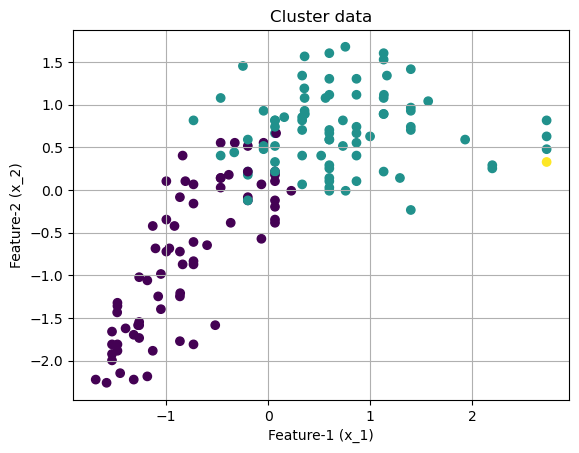

In [22]:
# BIRCH (class code)
opt_labels=maximize_silhouette(X_normalized,algo="birch",nmax=15, i_plot=True)
plot(X_normalized,opt_labels)

#### Analysis
From the result, the estimated optimal clusters would be 3. From the hyper-parameter graph, we can easily see that after the point that cluster=3 the silhouette score dropped dramatically, thus we can easily see that when cluster=3, we will get the maximum silhouette score. Thus, we can conclude that by using the Birch method, the optimal clusters would be 3.